# Pengujian Terhadap Learning Rate

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import sys
sys.dont_write_bytecode = True
sys.path.append('..')

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer, InputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType, RegularizationType
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
input_size = 784
hidden_layers = 5
hidden_size = 128
output_size = 10
param_1 = 0
param_2 = 0.5
batch_size = 64

In [46]:
# Load MNIST dataset using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

## 1. Learning Rate 0.0001

In [47]:
ann1 = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

In [48]:
loss1 = ann1.train(
        x=X_train,
        y=y_train,
        loss_function=LossFunction.categorical_cross_entropy,
        lr=0.0001,
        epochs=500,
        batch_size=batch_size,
        verbose=True,
        validation_data=(X_test, y_test),
    )

Training: 100%|██████████| 500/500 [09:04<00:00,  1.09s/it, Loss: 1.7436, Val Loss: 1.8281] 

Total training time: 519.84s


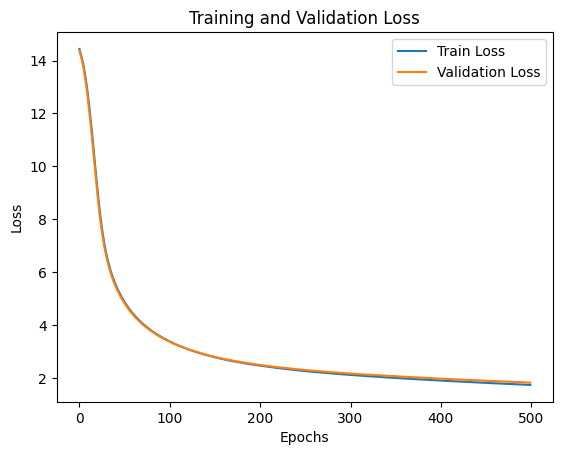

In [49]:
epoch_losses1, val_losses1 = loss1

plt.plot(epoch_losses1, label='Train Loss')
plt.plot(val_losses1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

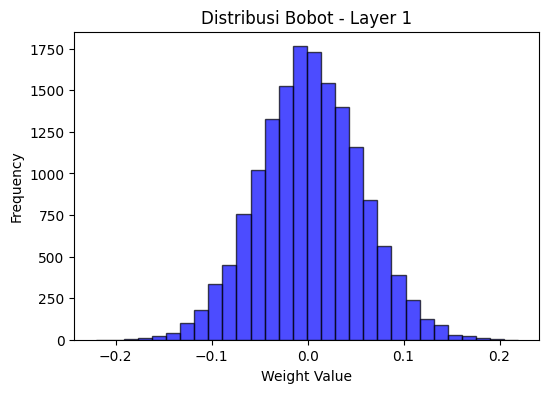

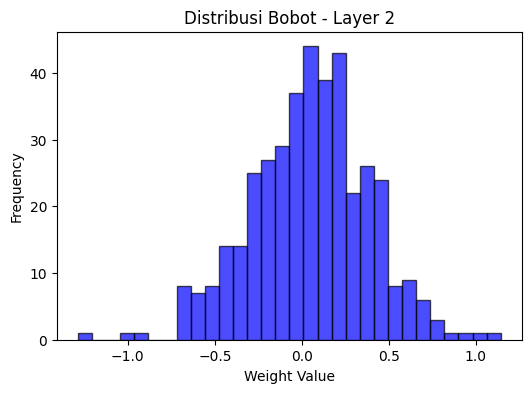

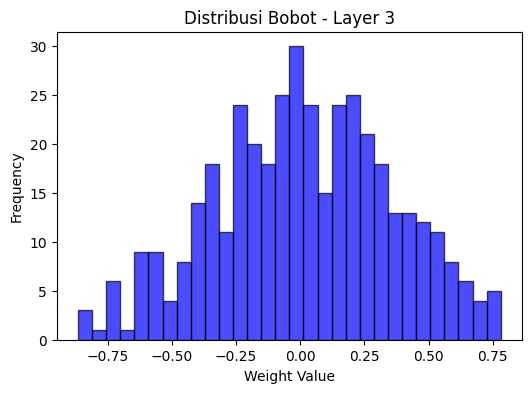

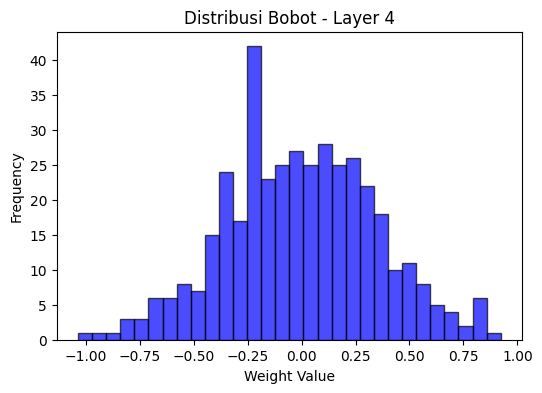

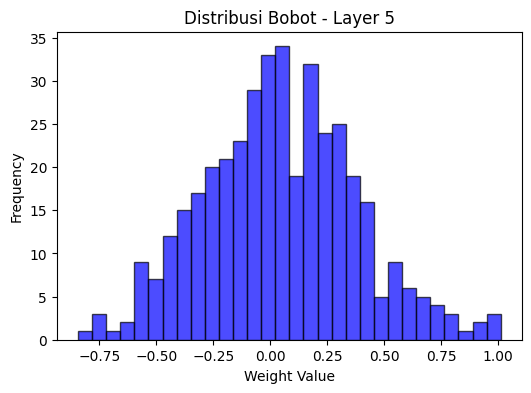

In [60]:
ann1.visualize_weight_distribution((1,2,3,4,5))

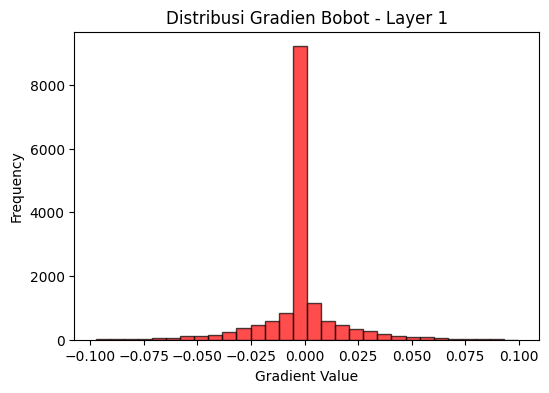

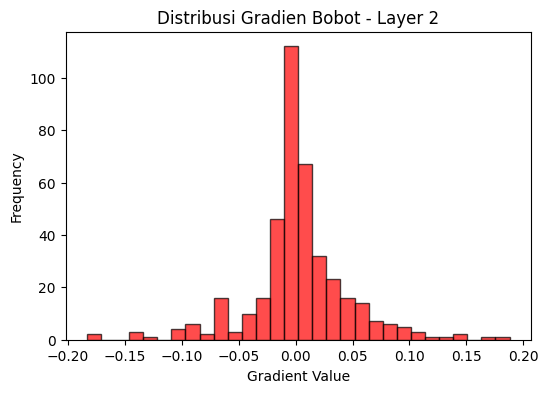

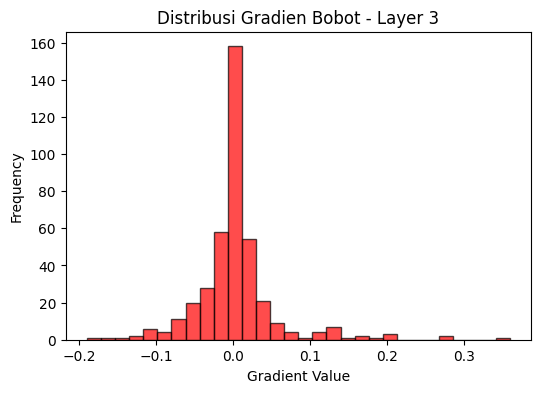

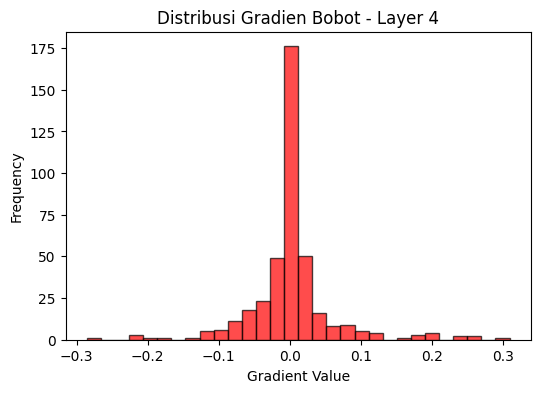

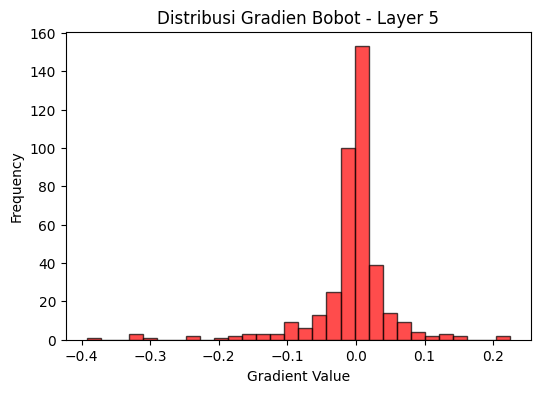

In [64]:
ann1.visualize_gradient_distribution((1,2,3,4,5))

In [50]:
from sklearn.metrics import f1_score

y_pred1 = ann1.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred1, average='macro')}")

F1 Score: 0.9302532990200199


## 2. Learning Rate = 0.01

In [51]:
ann2 = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

In [52]:
loss2 = ann2.train(
        x=X_train,
        y=y_train,
        loss_function=LossFunction.categorical_cross_entropy,
        lr=0.01,
        epochs=500,
        batch_size=batch_size,
        verbose=True,
        validation_data=(X_test, y_test),
    )

Training: 100%|██████████| 500/500 [09:37<00:00,  1.15s/it, Loss: 0.0034, Val Loss: 0.7339]

Total training time: 550.54s


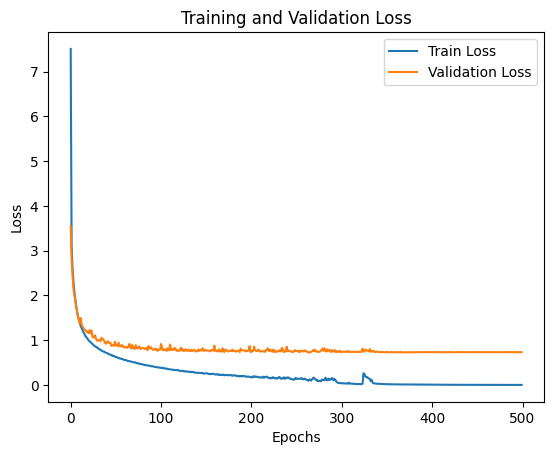

In [53]:
epoch_losses2, val_losses2 = loss2

plt.plot(epoch_losses2, label='Train Loss')
plt.plot(val_losses2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

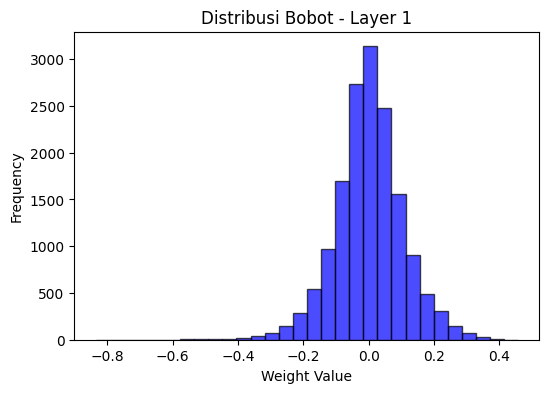

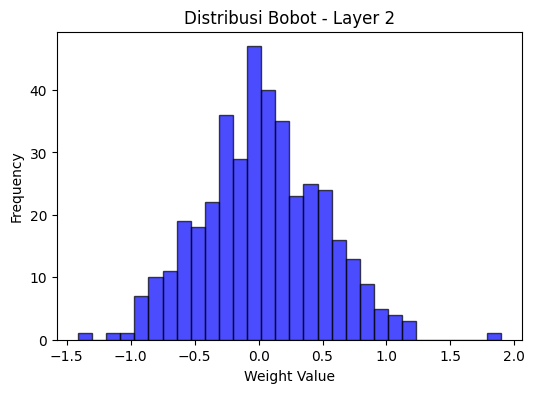

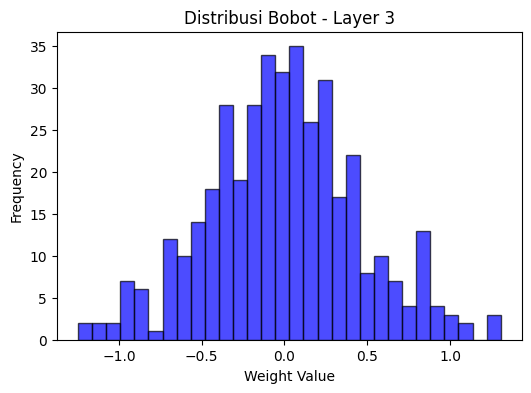

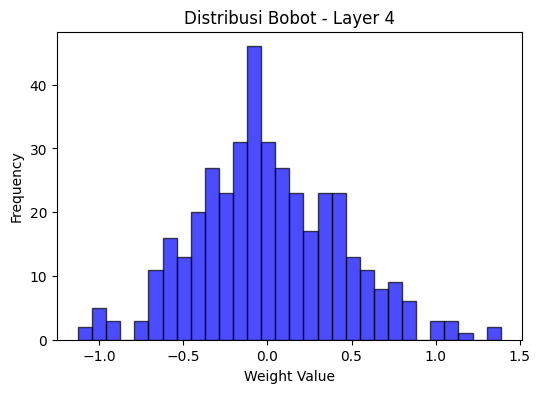

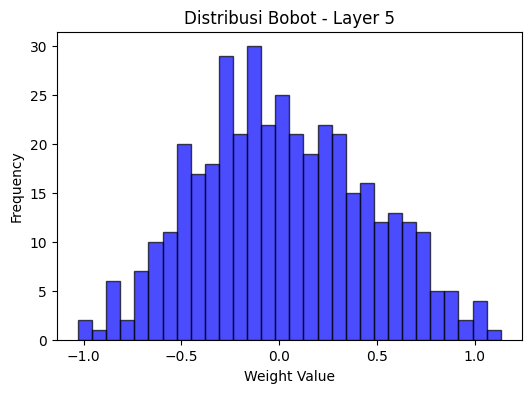

In [61]:
ann2.visualize_weight_distribution((1,2,3,4,5))

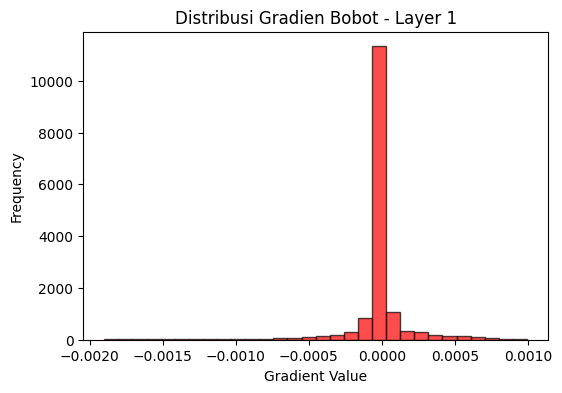

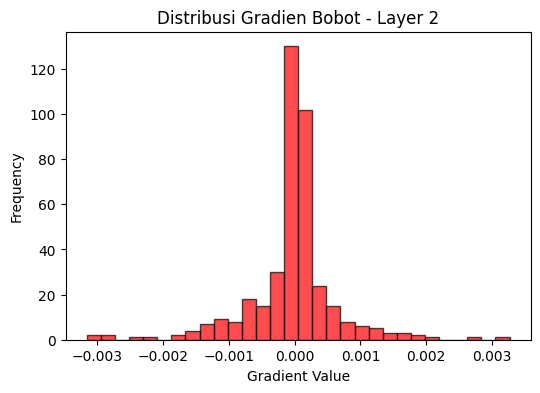

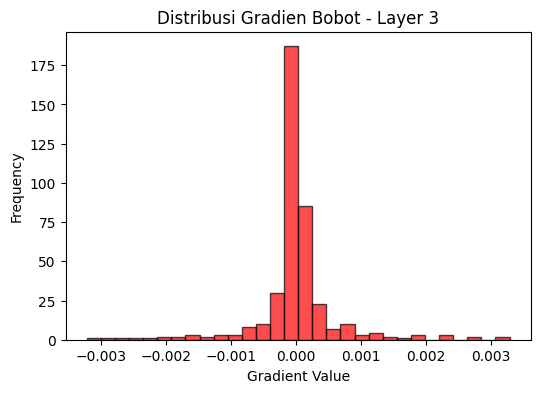

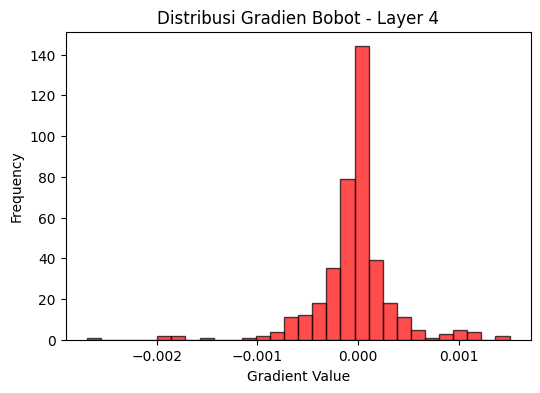

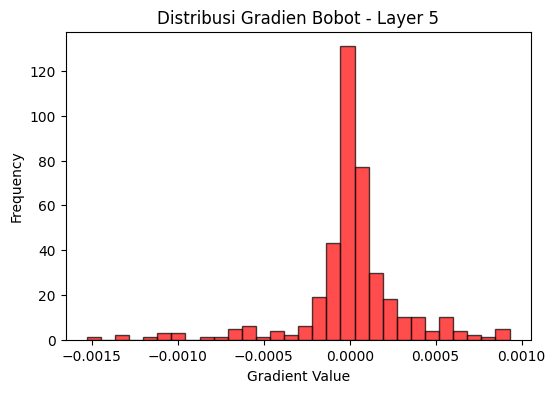

In [68]:
ann2.visualize_gradient_distribution((1,2,3,4,5))

In [54]:
from sklearn.metrics import f1_score

y_pred2 = ann2.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred2, average='macro')}")

F1 Score: 0.9550249525342206


## 3. Learning Rate = 1

In [55]:
ann3 = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=20,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.ZERO,
            input_size=20,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

In [56]:
loss3 = ann3.train(
        x=X_train,
        y=y_train,
        loss_function=LossFunction.categorical_cross_entropy,
        lr=1,
        epochs=500,
        batch_size=batch_size,
        verbose=True,
        validation_data=(X_test, y_test),
    )

Training: 100%|██████████| 500/500 [09:12<00:00,  1.11s/it, Loss: 14.5099, Val Loss: 14.5077]

Total training time: 526.02s


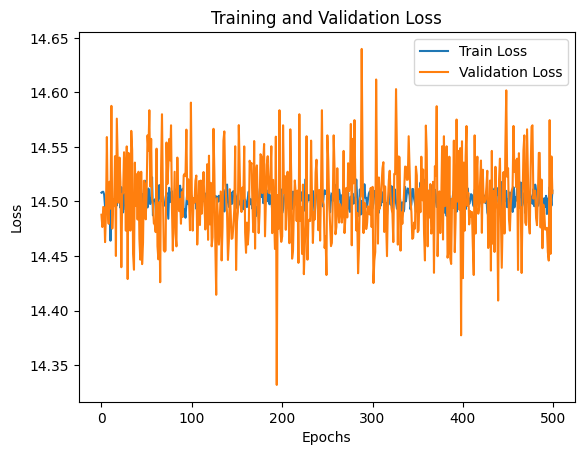

In [57]:
epoch_losses3, val_losses3 = loss3

plt.plot(epoch_losses3, label='Train Loss')
plt.plot(val_losses3, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

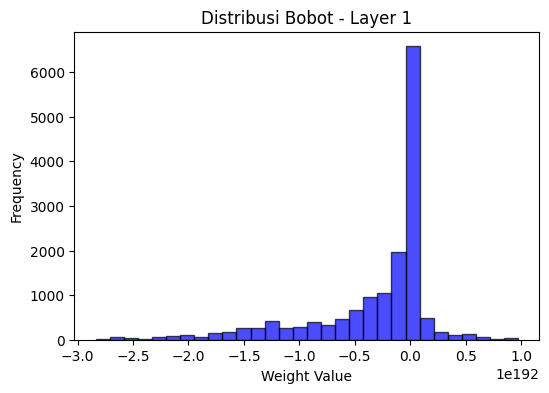

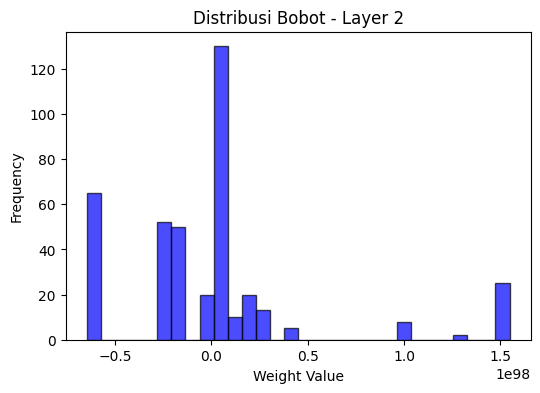

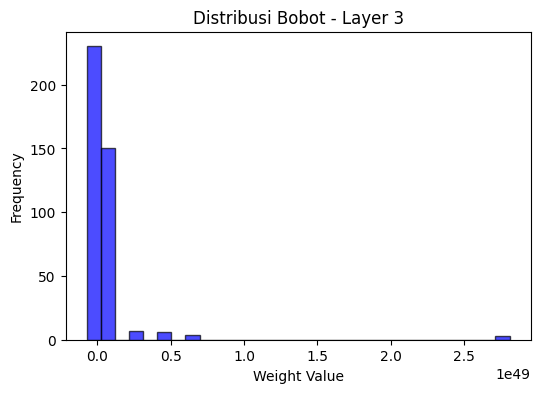

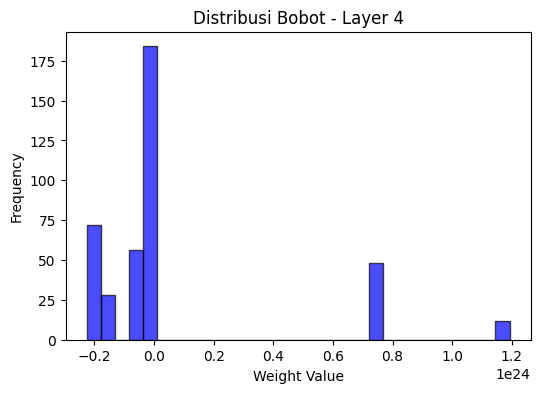

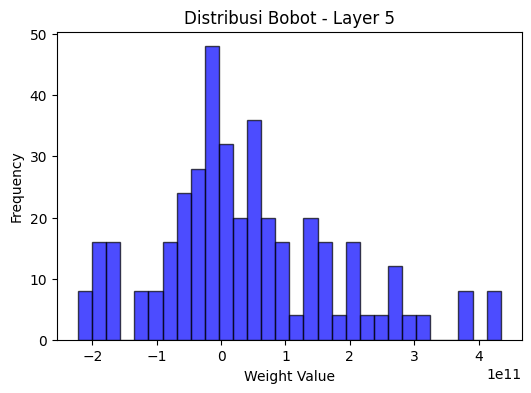

In [62]:
ann3.visualize_weight_distribution((1,2,3,4,5))

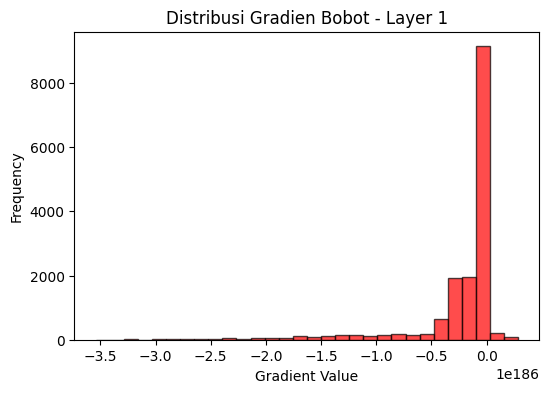

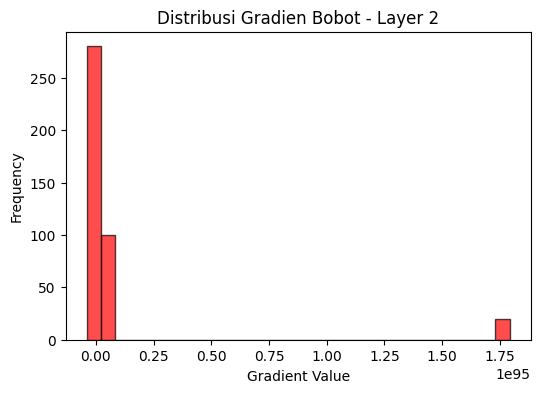

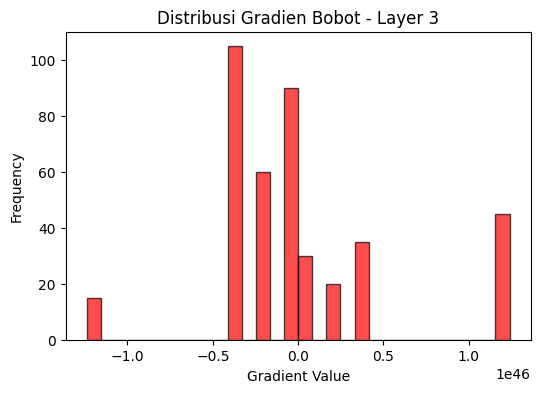

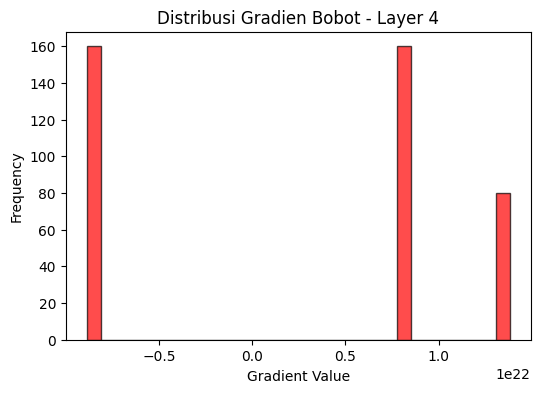

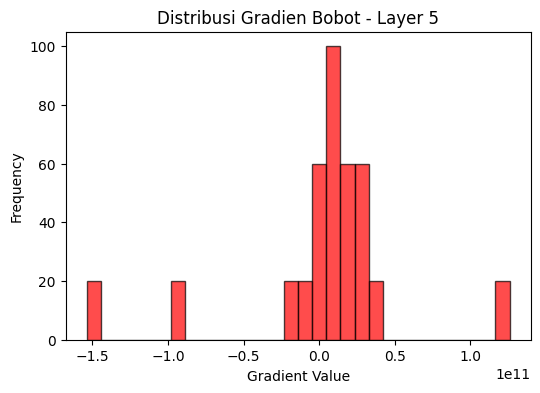

In [69]:
ann3.visualize_gradient_distribution((1,2,3,4,5))

In [58]:
from sklearn.metrics import f1_score

y_pred3 = ann3.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred3, average='macro')}")

F1 Score: 0.017945383615084527


## Analisis

Learning rate 0.01 menghasilkan performa terbaik (F1 Score: 0.955) karena memberikan update bobot yang cukup besar namun stabil, memungkinkan model belajar secara efektif. Learning rate 0.0001 (F1 Score: 0.930) terlalu kecil sehingga proses belajar lambat dan mungkin belum mencapai konvergensi optimal dalam 500 epoch (model belum cukup untuk mengeksplorasi dan menemukan pola terbaik di data). Sementara itu, learning rate 1.0 (F1 Score: 0.017) terlalu besar, menyebabkan model tidak stabil dan gagal belajar. 